# QUALITY PREDICTION IN A MINING PROCESS

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
dataset=pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')
dataset

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [3]:
dataset=dataset.set_index('date')
dataset

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


In [4]:
dataset.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

### Data Visualization

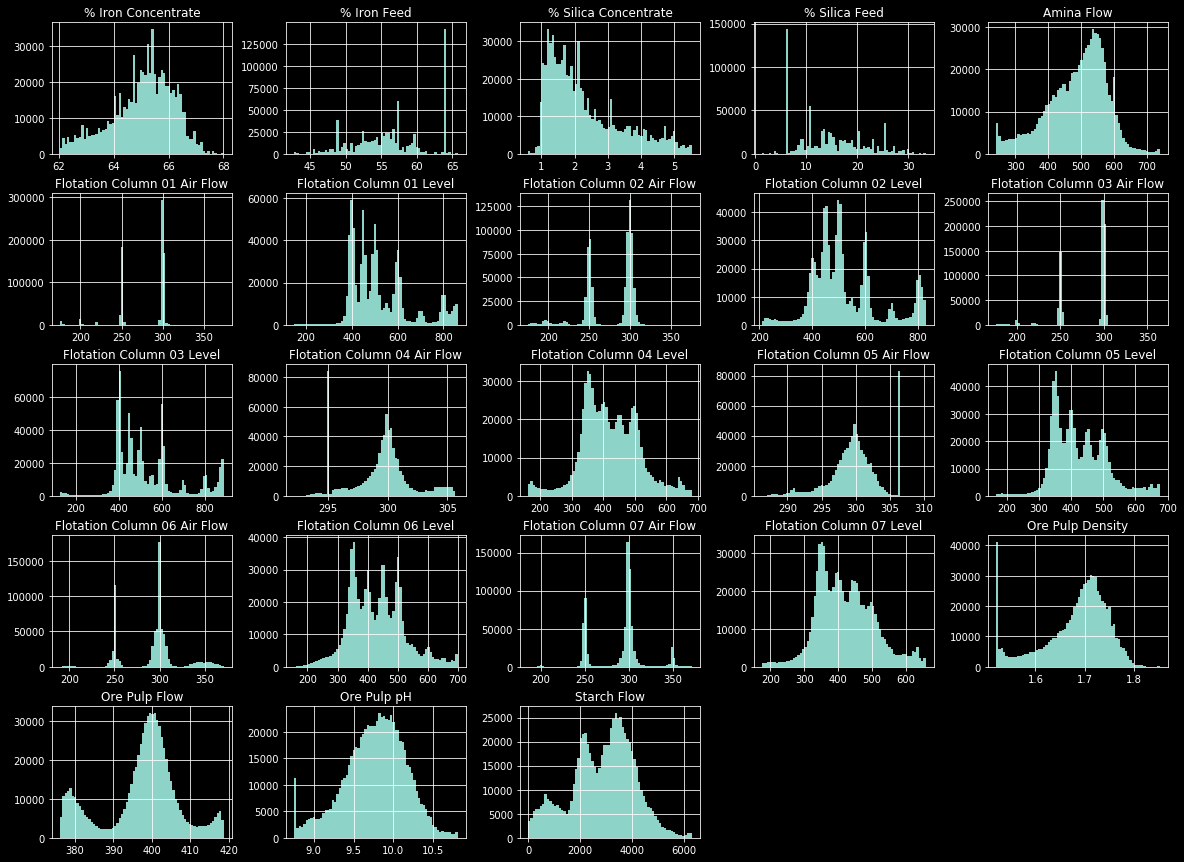

In [5]:
from matplotlib import style
plt.style.use(['dark_background'])
dataset.hist(bins = 70, figsize = (20,15))
plt.show()

### Taking Care Of Missing Data

In [6]:
dataset.isnull().any()

% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool

In [7]:
dataset.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [9]:
dataset.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [10]:
# #Find outliers using IQR Score(i.e. IQR=Q3-Q1) 
# Q1 = dataset.quantile(0.25)
# Q3 = dataset.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [11]:
# dataset = dataset[~((dataset < (Q1 - 3 * IQR)) |(dataset > (Q3 + 3 * IQR))).any(axis=1)]
# dataset

### Removal of outliers using ZScore method

In [12]:
from scipy import stats
z=np.abs(stats.zscore(dataset))
z

array([[0.21225167, 0.34202086, 0.12375664, ..., 1.20533681, 1.66266665,
        0.90334565],
       [0.21225167, 0.34202086, 0.12777243, ..., 0.90767427, 1.66266665,
        0.90334565],
       [0.21225167, 0.34202086, 0.14344883, ..., 0.44227984, 1.66266665,
        0.90334565],
       ...,
       [1.26891589, 1.25572783, 0.14560578, ..., 0.1426383 , 0.69733357,
        0.54796473],
       [1.26891589, 1.25572783, 1.40307479, ..., 0.15248617, 0.69733357,
        0.54796473],
       [1.26891589, 1.25572783, 1.40307479, ..., 0.23748886, 0.69733357,
        0.54796473]])

In [13]:
dataset=dataset[(z<3).all(axis=1)]
dataset

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


In [14]:
dataset.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971904,0.011367,-0.114745,0.151876,-0.011898,-0.159031,-0.090870,-0.199076,-0.079996,...,-0.027861,0.043166,0.034615,0.033315,0.029626,0.038334,0.020021,0.039042,0.041392,-0.060441
% Silica Feed,-0.971904,1.000000,0.000541,0.105297,-0.142555,0.027206,0.139750,0.125006,0.212935,0.105045,...,0.059373,-0.053945,-0.052499,-0.041500,-0.048969,-0.060847,-0.037227,-0.062875,-0.029224,0.053983
Starch Flow,0.011367,0.000541,1.000000,0.238315,0.029396,0.244051,0.206973,0.139012,0.141456,0.141857,...,0.160133,-0.272592,-0.256739,-0.272049,0.019309,-0.026772,-0.037633,-0.016600,0.050081,-0.043997
Amina Flow,-0.114745,0.105297,0.238315,1.000000,0.205013,0.102353,0.644208,0.073645,0.092472,0.074770,...,0.046667,-0.267680,-0.238059,-0.269900,-0.147807,-0.190395,-0.171055,-0.151781,-0.128767,0.184996
Ore Pulp Flow,0.151876,-0.142555,0.029396,0.205013,1.000000,0.107597,-0.008581,-0.178047,-0.146829,-0.164571,...,-0.167413,-0.001564,0.001770,-0.043244,0.003027,0.024220,-0.007433,0.032460,0.074325,0.018504
Ore Pulp pH,-0.011898,0.027206,0.244051,0.102353,0.107597,1.000000,0.089717,0.122481,0.115196,0.164784,...,0.148993,-0.143794,-0.126893,-0.107877,0.073112,0.032062,-0.048401,0.031358,0.175461,-0.124634
Ore Pulp Density,-0.159031,0.139750,0.206973,0.644208,-0.008581,0.089717,1.000000,-0.062713,-0.012787,-0.070647,...,-0.105165,-0.098332,-0.082089,-0.121713,-0.049818,-0.107672,-0.063191,-0.062250,-0.004226,0.076765
Flotation Column 01 Air Flow,-0.090870,0.125006,0.139012,0.073645,-0.178047,0.122481,-0.062713,1.000000,0.826089,0.961047,...,0.625475,-0.386302,-0.372005,-0.295921,0.013924,-0.019452,-0.049603,-0.048104,0.066605,-0.189333
Flotation Column 02 Air Flow,-0.199076,0.212935,0.141456,0.092472,-0.146829,0.115196,-0.012787,0.826089,1.000000,0.848126,...,0.544456,-0.385669,-0.383750,-0.302179,-0.009393,-0.051811,-0.059036,-0.056857,0.033123,-0.144872
Flotation Column 03 Air Flow,-0.079996,0.105045,0.141857,0.074770,-0.164571,0.164784,-0.070647,0.961047,0.848126,1.000000,...,0.636937,-0.389603,-0.371603,-0.301552,0.014712,-0.013602,-0.045580,-0.033893,0.075976,-0.192233


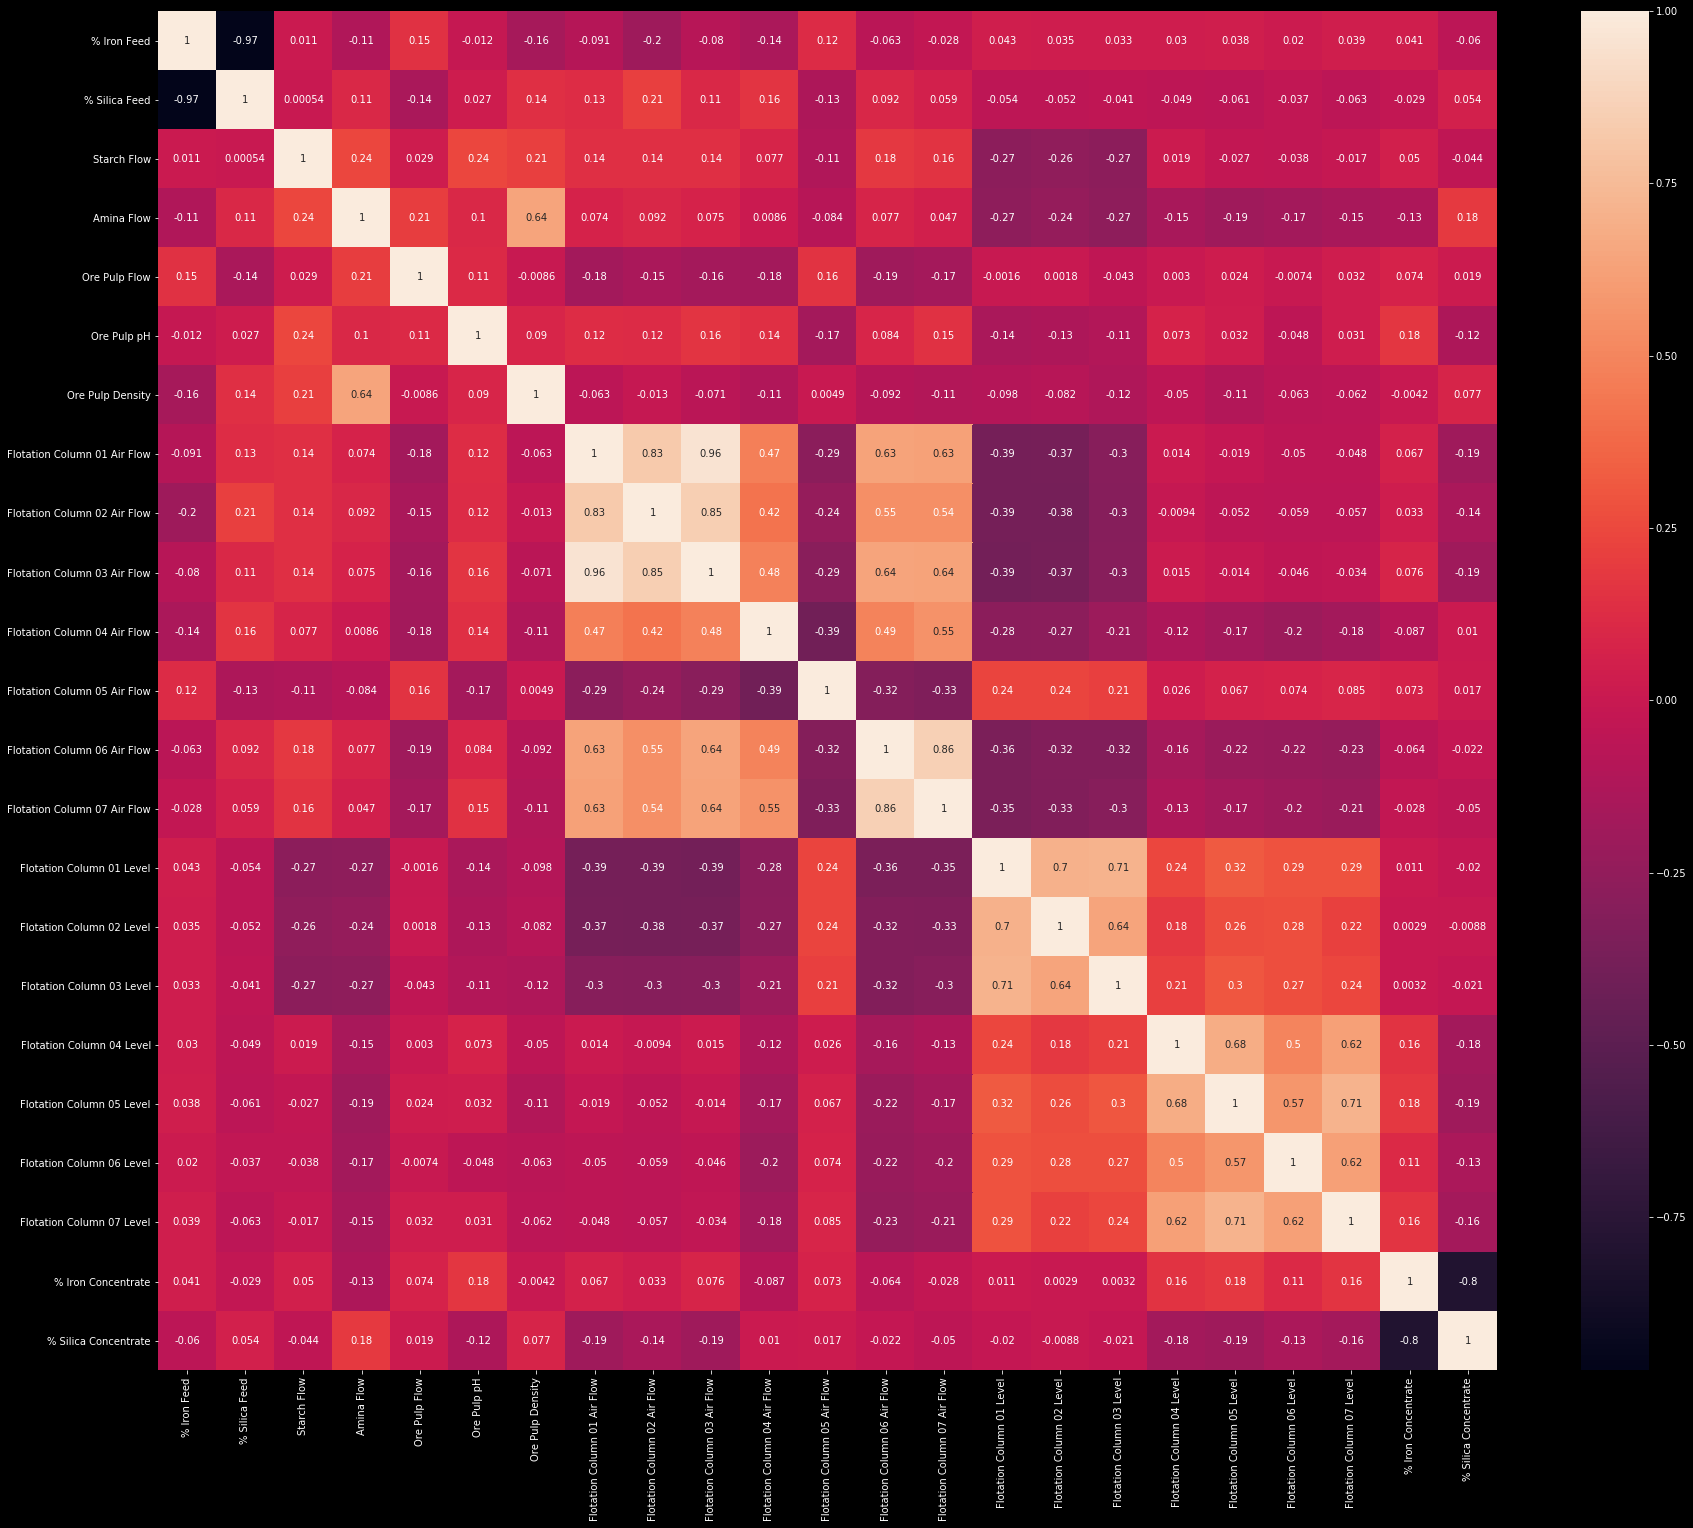

In [15]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(dataset.corr(), annot=True)

In [16]:
dataset.reset_index(inplace=True)
dataset

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717883,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
717884,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
717885,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
717886,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [17]:
silic_corr = dataset.corr()['% Silica Concentrate']
silic_corr = abs(silic_corr).sort_values()
silic_corr

Flotation Column 02 Level       0.008825
Flotation Column 04 Air Flow    0.010261
Flotation Column 05 Air Flow    0.016997
Ore Pulp Flow                   0.018504
Flotation Column 01 Level       0.020102
Flotation Column 03 Level       0.021418
Flotation Column 06 Air Flow    0.022367
Starch Flow                     0.043997
Flotation Column 07 Air Flow    0.049936
% Silica Feed                   0.053983
% Iron Feed                     0.060441
Ore Pulp Density                0.076765
Ore Pulp pH                     0.124634
Flotation Column 06 Level       0.133126
Flotation Column 02 Air Flow    0.144872
Flotation Column 07 Level       0.164820
Flotation Column 04 Level       0.176326
Amina Flow                      0.184996
Flotation Column 01 Air Flow    0.189333
Flotation Column 05 Level       0.190304
Flotation Column 03 Air Flow    0.192233
% Iron Concentrate              0.797066
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [18]:
drop_index= silic_corr.index[:5].tolist() + ['date']
print (drop_index)

['Flotation Column 02 Level', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Ore Pulp Flow', 'Flotation Column 01 Level', 'date']


Above plot (Heatmap) shows the correaltions between the features. From the list we can find out the features which affects the % Silica Concentrate the most and discard the least important ones

In [19]:
dataset = dataset.drop(drop_index, axis=1)
dataset.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,10.0664,1.74,249.214,253.235,250.576,250.225,250.884,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,10.0672,1.74,249.719,250.532,250.862,250.137,248.994,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,10.0680,1.74,249.741,247.874,250.313,251.345,248.071,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,10.0689,1.74,249.917,254.487,250.049,250.422,251.147,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,10.0697,1.74,250.203,252.136,249.895,249.983,248.928,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [20]:
dataset.shape

(717888, 18)

### Export Clean Data into a CSV ready for modeling

In [21]:
export_csv=dataset.to_csv('ML_data.csv',header=True,index=True)